The Classification algorithm is a Supervised Learning technique that is used to identify the category of new observations on the basis of training data. In Classification, a program learns from the given dataset or observations and then classifies new observation into a number of classes or groups. Such as, Yes or No, 0 or 1, Spam or Not Spam, cat or dog, etc. Classes can be called as targets/labels or categories.

Unlike regression, the output variable of Classification is a category, not a value, such as "Green or Blue", "fruit or animal", etc. Since the Classification algorithm is a Supervised learning technique, hence it takes labeled input data, which means it contains input with the corresponding output.

In classification algorithm, a discrete output function(y) is mapped to input variable(x).

The best example of an ML classification algorithm is Email Spam Detector.

The main goal of the Classification algorithm is to identify the category of a given dataset, and these algorithms are mainly used to predict the output for the categorical data.

The application of machine learning has grown in popularity in today's fast-paced society as technology has permeated every aspect of our lives. Placement prediction is one of the numerous uses of machine learning. Using machine learning algorithms, placement prediction determines the likelihood that a student will be hired by a firm based on a variety of criteria, including academic achievement, skill set, and prior job experience.

Working of Placement Prediction Using Machine Learning

In order to anticipate placement, information is gathered from a variety of sources, including academic transcripts, resumes, and prior job experience.
After that, this data is cleansed and preprocessed to remove any discrepancies or mistakes.
After being cleaned, the data is divided into two categories: training data and testing data.
The machine learning algorithm is trained using the training data, and its effectiveness is assessed using the testing data. The system is taught using a variety of methods, including neural networks, decision trees, and regression analysis.
A statistical method for determining the relationship between two or more variables is regression analysis. Regression analysis is used in placement prediction to determine the link between numerous variables, including academic achievement, skill set, prior job experience, and the likelihood of being hired by a firm.

A sort of machine learning algorithm known as a decision tree models decisions and potential outcomes using a tree-like structure. Decision trees are employed in the placement prediction scenario to simulate the hiring process decision-making of businesses.

The structure and operation of the human brain served as the inspiration for the machine learning algorithm known as neural networks. Neural networks are used in placement prediction to represent the intricate connections between many elements that influence the likelihood of being hired by a firm.

The algorithm is tested using the testing data once it has been trained to assess its performance. The algorithm's effectiveness is evaluated using a number of measures, including accuracy, precision, recall, and F1 score. These metrics give a sense of how effective the algorithm is in predicting a student's placement likelihood.

Advantages of Employing Machine Learning for Placement Prediction
There are various advantages of using machine learning algorithms to anticipate placement.

Automating the preliminary screening of candidates cuts down on the time and work needed for the hiring process.
It offers a recruiting process that is more data-driven and objective, minimizing the influence of subjectivity and prejudice.
It gives businesses a chance to find people they would have missed via conventional hiring procedures.

pip install plotly

1. Importing Libraries

In [1]:
import numpy as np  
import pandas as pd  
  
import matplotlib.pyplot as plt  
import plotly.express as px  
from plotly.offline import init_notebook_mode, iplot  
init_notebook_mode(connected=True)  
  
from sklearn.decomposition import PCA  

from sklearn. preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  
  
from sklearn.metrics import accuracy_score  
from sklearn.metrics import precision_score, recall_score, f1_score  


2. Reading the Dataset

In [2]:
dataframe = pd.read_csv('collegePlace.csv')  

In [3]:
# Getting to know the shape of data (rows, columns)
dataframe.shape  

(2966, 8)

In [4]:
# Showing the first 5 rows of the dataset  
dataframe.head()  

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [5]:
# Showing 4 rows of the dataset at random  
dataframe.sample(4)  

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
2901,21,Male,Electronics And Communication,0,7,0,0,1
1228,22,Male,Mechanical,0,9,1,1,1
1298,22,Male,Computer Science,1,8,0,0,1
1828,20,Female,Mechanical,1,8,1,0,1


In [6]:
# Getting to know the data type of columns that are in the dataset  
dataframe.dtypes  

Age                   int64
Gender               object
Stream               object
Internships           int64
CGPA                  int64
Hostel                int64
HistoryOfBacklogs     int64
PlacedOrNot           int64
dtype: object

In [7]:
# Getting to know the detailed information of the columns  
dataframe.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [8]:
# Statistical Descriptions of the numerical values in the dataset  
dataframe.describe()  

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


In [9]:
# Getting to know the correlation between the target column and other features.  
#dataframe.corr()['PlacedOrNot']  
y1 = dataframe['PlacedOrNot']
y1

0       1
1       1
2       1
3       1
4       1
       ..
2961    0
2962    0
2963    0
2964    0
2965    1
Name: PlacedOrNot, Length: 2966, dtype: int64

3. Preprocessing -
Preprocessing is an important step in machine learning, which means having the data ready and clean before feeding it to the algorithm for learning. Preprocessing is the process of converting raw data into a format appropriate for analysis and modeling.

Now, we will be checking if there are any missing or duplicate values in the dataset.

In [10]:
# missing values  
dataframe.isnull().sum()  

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [11]:
# duplicate rows  
print(dataframe.duplicated().sum())  
  
#drop duplicates  
dataframe.drop_duplicates(inplace=True)  

1829


In [12]:
# Check if the duplicate rows are removed  
print(dataframe.duplicated().sum())  

0


4. EDA
Exploratory data analysis is an important stage in machine learning, which involves examining and visualizing the data to learn more about its composition, traits, and trends. It is carried out prior to developing the actual machine learning model and is crucial for spotting possible difficulties and choosing the right preprocessing and feature engineering strategies.

In [13]:
# Plotting  the graph so that we can visualize the output with respect to major features  
figure = px.scatter(dataframe, x="CGPA", y="Internships", color="PlacedOrNot",  
                 hover_data=['CGPA'])  
figure.show()

In [14]:
# Plotting Histogram for the count of place and not placed  
px.histogram(dataframe, x='PlacedOrNot', color='PlacedOrNot', barmode='group')  

In [15]:
# Pie Chart: Percentage pie chart of Placed or Not Placed  
figure = px.pie(dataframe, values=dataframe['PlacedOrNot'].value_counts().values, names=dataframe['PlacedOrNot'].value_counts().index, title='Placed Vs Not Placed')  
figure.show()  

In [16]:
# Printing the Age of the youngest and Eldest student who is placed  
print("Max Age of Placed Person: ",dataframe[(dataframe['Age'] == dataframe['Age'].max()) & (dataframe['PlacedOrNot']==1)]['Age'].values[0])  
print("Min Age of Placed Person: ",dataframe[(dataframe['Age'] == dataframe['Age'].min()) & (dataframe['PlacedOrNot']==1)]['Age'].values[0])  

Max Age of Placed Person:  30
Min Age of Placed Person:  19


In [17]:
# Printing the Maximum and the Minimum number of internships done by the student who is placed.   
#We will also print the Maximum and Minimum number of students who did the max internship and the minimum number of internships.  
print("Max Internships Done by the Placed Student: ",dataframe[(dataframe['Internships'] == dataframe['Internships'].max()) & (dataframe['PlacedOrNot']==1)]['Internships'].values[0])  
print("No of students who did max Internships and are placed: ",dataframe[(dataframe['Internships'] == dataframe['Internships'].max()) & (dataframe['PlacedOrNot']==1)]['Internships'].value_counts().values[0])  
  
print("Min Internships Done by the Placed Person: ",dataframe[(dataframe['Internships'] == dataframe['Internships'].min()) & (dataframe['PlacedOrNot']==1)]['Internships'].values[0])  
print("No of students who did min Internships and are placed: ",dataframe[(dataframe['Internships'] == dataframe['Internships'].min()) & (dataframe['PlacedOrNot']==1)]['Internships'].value_counts().values[0])  

Max Internships Done by the Placed Student:  3
No of students who did max Internships and are placed:  35
Min Internships Done by the Placed Person:  0
No of students who did min Internships and are placed:  232


In [18]:
# Printing the Maximum and Minimum number of CGPA obtained by the student who is placed.  
# We will also print the Maximum and the Minimum number of students who got the max CGPA and minimum CGPA who are placed.  
  
print("Max CGPA of Placed Student: ",dataframe[(dataframe['CGPA'] == dataframe['CGPA'].max()) & (dataframe['PlacedOrNot']==1)]['CGPA'].values[0])  
print("No of students has max CGPA and are placed: ",dataframe[(dataframe['CGPA'] == dataframe['CGPA'].max()) & (dataframe['PlacedOrNot']==1)]['CGPA'].value_counts().values[0])  
  
print("Min CGPA of Placed Person: ",dataframe[(dataframe['CGPA'] == dataframe['CGPA'].min()) & (dataframe['PlacedOrNot']==1)]['CGPA'].values[0])  
print("No of students has min CGPA and are placed: ",dataframe[(dataframe['CGPA'] == dataframe['CGPA'].min()) & (dataframe['PlacedOrNot']==1)]['CGPA'].value_counts().values[0])  

Max CGPA of Placed Student:  9
No of students has max CGPA and are placed:  99
Min CGPA of Placed Person:  5
No of students has min CGPA and are placed:  5


5. Representation
The process of statistical representation involves using statistical measures and visualizations to present data in a meaningful and understandable manner with the main objective of enabling the user to understand insights and patterns in the data and make well-informed decisions using the data.

In [19]:
figure = px.box(dataframe, y='CGPA')  
figure.show()  

In [20]:
figure = px.box(dataframe, y='Age')  
figure.show()  

In [21]:
figure = px.box(dataframe, y=['Internships','CGPA', 'Age'])  
figure.show()  

6. Encoding Categorical to Numerical
In machine learning, encoding categorical variables to numeric variables is a typical preprocessing step. It requires changing a qualitative attribute-representing category variable into a numerical variable that may be employed in mathematical operations and models.

In [22]:
# Converting Gender column  
dataframe['Gender'] = dataframe['Gender'].map({'Male': 1, 'Female': 0})  

In [23]:
dataframe['Stream'].unique()  

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [24]:
# Converting Stream column  
dataframe['Stream'] = dataframe['Stream'].map({'Electronics And Communication': 1,  
                                 'Computer Science': 2,  
                                'Information Technology': 3,  
                                'Mechanical':4,  
                                'Electrical':5,  
                                'Civil':6})  

In [25]:
dataframe.sample(5)  

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
34,21,1,2,1,6,0,0,1
2495,19,1,2,0,6,0,1,0
894,22,1,3,0,7,0,0,1
2873,23,0,1,0,7,0,0,1
577,21,1,6,0,7,1,0,0


7. Extracting Input and Output Columns

In [26]:
X = dataframe.iloc[:,0:7]  
y = dataframe.iloc[:,-1]  
X  

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
0,22,1,1,1,8,1,1
1,21,0,2,0,7,1,1
2,22,0,3,1,6,0,0
3,21,1,3,0,8,0,1
4,22,1,4,0,8,1,0
...,...,...,...,...,...,...,...
2946,23,1,3,1,7,1,1
2952,23,1,4,0,8,1,0
2954,23,0,2,1,8,0,1
2958,23,1,2,0,6,0,1


In [27]:
# Getting the shape of the X and Y  
print(X.shape)  
print(y.shape)  

(1137, 7)
(1137,)


In [28]:
# Splitting the dataset into training and testing datasets.  
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33)  

In [29]:
# Getting the Shape of all the training and testing dataset  
print(X_train.shape)  
print(X_test.shape)  
print(y_train.shape)  
print(y_test.shape)  

(761, 7)
(376, 7)
(761,)
(376,)


9. Scaling the Values

Scale Features
When your data has different values, and even different measurement units, it can be difficult to compare them. What is kilograms compared to meters? Or altitude compared to time?

The answer to this problem is scaling. We can scale data into new values that are easier to compare.

In [30]:
scaler = StandardScaler()  
X_train_scale = scaler.fit_transform(X_train)  
X_test_scale = scaler.transform(X_test)  

10. Training & Evaluating the Model

Training and evaluating the model are the two critical steps in machine learning that determine the accuracy and performance of the model. These steps require careful planning, attention to detail, and rigorous evaluation to develop a model that can generalize well to new, unseen data.

Here will go with different machine learning algorithms and find their accuracy.

1. Logistic Regression

Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.

Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, cancerous or not, a mouse is obese or not based on its weight, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.

Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.

Logistic Regression is a significant machine learning algorithm because it has the ability to provide probabilities and classify new data using continuous and discrete datasets.

Cross Validation

When adjusting models we are aiming to increase overall model performance on unseen data. Hyperparameter tuning can lead to much better performance on test sets. However, optimizing parameters to the test set can lead information leakage causing the model to perform worse on unseen data. To correct for this we can perform cross validation.

In [31]:
from sklearn.linear_model import LogisticRegression  
classifier = LogisticRegression()  
  
# Without Scaling  
classifier.fit(X_train,y_train)  
y_pred = classifier.predict(X_test)  
print("Without Scaling and CV: ",accuracy_score(y_test,y_pred))  
scores = cross_val_score(classifier, X_train, y_train, cv=10)  
print("Without Scaling and With CV: ",scores.mean())  
  
# With Scaling  
classifier.fit(X_train_scale,y_train)  
y_pred = classifier.predict(X_test_scale)  
print("With Scaling and Without CV: ",accuracy_score(y_test,y_pred))  
scores = cross_val_score(classifier, X_train_scale, y_train, cv=10)  
print("With Scaling and With CV: ",scores.mean())  
  
#scaling has not much effect  

Without Scaling and CV:  0.7180851063829787
Without Scaling and With CV:  0.7358339029391661
With Scaling and Without CV:  0.7207446808510638
With Scaling and With CV:  0.7358339029391661


2. Decision Tree Classifier

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [32]:
from sklearn.tree import DecisionTreeClassifier  
classifier = DecisionTreeClassifier(random_state=0)  
  
#without scaling  
classifier.fit(X_train,y_train)  
y_pred = classifier.predict(X_test)  
print("Without Scaling and CV: ",accuracy_score(y_test,y_pred))  
scores = cross_val_score(classifier, X_train, y_train, cv=10)  
print("Without Scaling and With CV: ",scores.mean())  
  
# With Scaling  
classifier.fit(X_train_scale,y_train)  
y_pred = classifier.predict(X_test_scale)  
print("With Scaling and Without CV: ",accuracy_score(y_test,y_pred))  
scores = cross_val_score(classifier, X_train_scale, y_train, cv=10)  
print("With Scaling and With CV: ",scores.mean())  

Without Scaling and CV:  0.699468085106383
Without Scaling and With CV:  0.7503417634996583
With Scaling and Without CV:  0.699468085106383
With Scaling and With CV:  0.7503417634996583


3. Random Forest Classifier

"Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset." Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.

In [33]:
from sklearn.ensemble import RandomForestClassifier  
  
classifier = RandomForestClassifier(max_depth=10, random_state=0)  
#The maximum depth of the selection tree is a critical parameter that influences the version’s complexity.
classifier.fit(X_train,y_train)  
y_pred = classifier.predict(X_test)  
print("Without Scaling and CV: ",accuracy_score(y_test,y_pred))  
scores = cross_val_score(classifier, X_train, y_train, cv=10)  
print("Without Scaling and With CV: ",scores.mean())  
  
# With Scaling  
classifier.fit(X_train_scale,y_train)  
y_pred = classifier.predict(X_test_scale)  
print("With Scaling and Without CV: ",accuracy_score(y_test,y_pred))  
scores = cross_val_score(classifier, X_train_scale, y_train, cv=10)  
print("With Scaling and With CV: ",scores.mean())  

Without Scaling and CV:  0.7473404255319149
Without Scaling and With CV:  0.8002734107997267
With Scaling and Without CV:  0.7420212765957447
With Scaling and With CV:  0.8002734107997267


4. Support Vector Machines

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

In [34]:
from sklearn.svm import SVC  
  
svc = SVC()  
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}  
#kernel: Defines the kernel type, with ('linear', 'rbf') indicating both linear and radial basis function (RBF) kernels which is a more complex kernel that can handle non-linear boundarie will be tested.
#The regularization parameter C balances the trade-off between achieving a low training error and a low testing error, which is crucial to avoid overfitting.
classifier = GridSearchCV(svc, parameters)  
  
classifier.fit(X_train,y_train)  
y_pred = classifier.predict(X_test)  
print("Without Scaling and CV: ",accuracy_score(y_test,y_pred))  
scores = cross_val_score(classifier, X_train, y_train, cv=10)  
print("Without Scaling and With CV: ",scores.mean())  
  
# With Scaling  
classifier.fit(X_train_scale,y_train)  
y_pred = classifier.predict(X_test_scale)  
print("With Scaling and Without CV: ",accuracy_score(y_test,y_pred))  
scores = cross_val_score(classifier, X_train_scale, y_train, cv=10)  
print("With Scaling and With CV: ",scores.mean())  

Without Scaling and CV:  0.7127659574468085
Without Scaling and With CV:  0.7463602187286399
With Scaling and Without CV:  0.7659574468085106
With Scaling and With CV:  0.7766062884483937


5. Naive Bayes

Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions.
It is a probabilistic classifier, which means it predicts on the basis of the probability of an object.


In [35]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
#The Gaussian model assumes that features follow a normal distribution. This means if predictors take continuous values instead of discrete, 
#then the model assumes that these values are sampled from the Gaussian distribution.
classifier.fit(X_train,y_train)  
y_pred = classifier.predict(X_test)  
print("Without Scaling and CV: ",accuracy_score(y_test,y_pred))  
scores = cross_val_score(classifier, X_train, y_train, cv=10)  
print("Without Scaling and With CV: ",scores.mean())  
  
# With Scaling  
classifier.fit(X_train_scale,y_train)  
y_pred = classifier.predict(X_test_scale)  
print("With Scaling and Without CV: ",accuracy_score(y_test,y_pred))  
scores = cross_val_score(classifier, X_train_scale, y_train, cv=10)  
print("With Scaling and With CV: ",scores.mean())  

Without Scaling and CV:  0.7446808510638298
Without Scaling and With CV:  0.7490088858509911
With Scaling and Without CV:  0.7446808510638298
With Scaling and With CV:  0.7490088858509911


In [36]:
from sklearn.naive_bayes import MultinomialNB  
classifier = MultinomialNB()  
#he Multinomial Naïve Bayes classifier is used when the data is multinomial distributed. 
#It is primarily used for document classification problems, it means a particular document belongs to which category such as Sports, Politics, education, etc.
#The classifier uses the frequency of words for the predictors.
classifier.fit(X_train,y_train)  
y_pred = classifier.predict(X_test)  
print("Without Scaling and CV: ",accuracy_score(y_test,y_pred))  
scores = cross_val_score(classifier, X_train, y_train, cv=10)  
print("Without Scaling and With CV: ",scores.mean())  

Without Scaling and CV:  0.6196808510638298


Without Scaling and With CV:  0.6411654135338345


In [37]:
from sklearn.naive_bayes import BernoulliNB  
classifier = BernoulliNB()  
#The Bernoulli classifier works similar to the Multinomial classifier, but the predictor variables are the independent Booleans variables. 
#Such as if a particular word is present or not in a document. This model is also famous for document classification tasks.
classifier.fit(X_train,y_train)  
y_pred = classifier.predict(X_test)  
print("Without Scaling and CV: ",accuracy_score(y_test,y_pred))  
scores = cross_val_score(classifier, X_train, y_train, cv=10)  
print("Without Scaling and With CV: ",scores.mean())  
  
# With Scaling  
classifier.fit(X_train_scale,y_train)  
y_pred = classifier.predict(X_test_scale)  
print("With Scaling and Without CV: ",accuracy_score(y_test,y_pred))  
scores = cross_val_score(classifier, X_train_scale, y_train, cv=10)  
print("With Scaling and With CV: ",scores.mean())  

Without Scaling and CV:  0.5771276595744681
Without Scaling and With CV:  0.5598257006151743
With Scaling and Without CV:  0.6728723404255319
With Scaling and With CV:  0.6714456596035543


6. K-Nearest Neighbour - KNN

K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

In [38]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=3)  
#There is no particular way to determine the best value for "K", so we need to try some values to find the best out of them. 
# The most preferred value for K is 5.
classifier.fit(X_train,y_train)  
y_pred = classifier.predict(X_test)  
print("Without Scaling and CV: ",accuracy_score(y_test,y_pred))  
scores = cross_val_score(classifier, X_train, y_train, cv=10)  
print("Without Scaling and With CV: ",scores.mean())  

# With Scaling  
classifier.fit(X_train_scale,y_train)  
y_pred = classifier.predict(X_test_scale)  
print("With Scaling and Without CV: ",accuracy_score(y_test,y_pred))  
scores = cross_val_score(classifier, X_train_scale, y_train, cv=10)  
print("With Scaling and With CV: ",scores.mean())  

Without Scaling and CV:  0.7180851063829787
Without Scaling and With CV:  0.760868079289132
With Scaling and Without CV:  0.6702127659574468
With Scaling and With CV:  0.7450444292549556


Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegressionCV  
classifier = LogisticRegressionCV(cv=5, random_state=0)  
  
# Without Scaling  
classifier.fit(X_train,y_train)  
y_pred = classifier.predict(X_test)  
print("Without Scaling and CV: ",accuracy_score(y_test,y_pred))  
scores = cross_val_score(classifier, X_train, y_train, cv=10)  
print("Without Scaling and With CV: ",scores.mean())  
  
# With Scaling  
classifier.fit(X_train_scale,y_train)  
y_pred = classifier.predict(X_test_scale)  
print("With Scaling and Without CV: ",accuracy_score(y_test,y_pred))  
scores = cross_val_score(classifier, X_train_scale, y_train, cv=10)  
print("With Scaling and With CV: ",scores.mean())  

Without Scaling and CV:  0.7207446808510638
Without Scaling and With CV:  0.7318865345181135
With Scaling and Without CV:  0.7180851063829787
With Scaling and With CV:  0.7305707450444292


Model Selection
So the best accuracy among the models is of Random Forest Classifier.

Performance Metrics

In [40]:
classifier = RandomForestClassifier(max_depth=10, random_state=0)  
classifier.fit(X_train,y_train)  
y_pred = classifier.predict(X_test)  
print("Without CV: ",accuracy_score(y_test,y_pred))  
scores = cross_val_score(classifier, X_train, y_train, cv=10)  
print("With CV: ",scores.mean())  
print("Precision Score: ", precision_score(y_test, y_pred))  #Of the positives predicted, what percentage is truly positive
print("Recall Score: ", recall_score(y_test, y_pred))  
'''
Of all the positive cases, what percentage are predicted positive?
Sensitivity (sometimes called Recall) measures how good the model is at predicting positives.
This means it looks at true positives and false negatives (which are positives that have been incorrectly predicted as negative).
'''
print("F1 Score: ", f1_score(y_test, y_pred))  
'''
F-score is the "harmonic mean" of precision and sensitivity.
It considers both false positive and false negative cases and is good for imbalanced datasets.
'''

Without CV:  0.7473404255319149
With CV:  0.8002734107997267
Precision Score:  0.8315789473684211
Recall Score:  0.7149321266968326
F1 Score:  0.7688564476885644


'\nF-score is the "harmonic mean" of precision and sensitivity.\nIt considers both false positive and false negative cases and is good for imbalanced datasets.\n'

Tuning the Model
Using Hyper-Parameter tuning using GridsearchCV, Hypertune the parameters for Random forest and get the best parameters.

In [41]:
# Define the parameter grid
param_grid = {
    'bootstrap': [False, True],
    'max_depth': [5, 8, 10, 20],
    'max_features': [3, 4, 5, None],
    'min_samples_split': [2, 10, 12],
    'n_estimators': [100, 200, 300]
}
'''
'bootstrap': [False, True]: This specifies whether bootstrap samples are used when building trees. False means no bootstrapping, and True means bootstrapping.
'max_depth': [5, 8, 10, 20]: This specifies the maximum depth of the tree. Limiting the depth can help prevent overfitting.
'max_features': [3, 4, 5, None]: This specifies the number of features to consider when looking for the best split. None means considering all features.
'min_samples_split': [2, 10, 12]: This specifies the minimum number of samples required to split an internal node. A higher number can help prevent overfitting.
'n_estimators': [100, 200, 300]: This specifies the number of trees in the forest. More trees can improve performance but also increase computation time.
'''
# Instantiate the RandomForestClassifier
rfclassifier = RandomForestClassifier()

# Set up the GridSearchCV with the correct parameter
classifier = GridSearchCV(estimator=rfclassifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
'''
estimator=rfclassifier: This specifies the model to be used for training, which in this case is the RandomForestClassifier instance created earlier.
param_grid=param_grid: This specifies the parameter grid to search over, which is the dictionary defined earlier.
cv=5: This specifies the number of cross-validation folds to use. 5 means that the data will be split into 5 parts, and the model will be trained and validated 5 times, each time using a different part as the validation set and the remaining parts as the training set.
n_jobs=-1: This specifies the number of jobs to run in parallel. -1 means using all available processors, which can significantly speed up the grid search process.
verbose=1: This specifies the verbosity level. 1 means that the progress of the grid search will be printed to the console.
'''
# Fit the classifier on the training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Print the accuracy and the best parameters found by GridSearchCV
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classifier.best_params_)
print(classifier.best_estimator_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Accuracy:  0.7872340425531915
{'bootstrap': True, 'max_depth': 8, 'max_features': None, 'min_samples_split': 10, 'n_estimators': 100}
RandomForestClassifier(max_depth=8, max_features=None, min_samples_split=10)


Checking the accuracy of the model with the best parameters

Without CV:  0.7952127659574468
With CV:  0.8357484620642517
Precision Score:  0.9444444444444444
Recall Score:  0.6923076923076923
F1 Score:  0.7989556135770235
Precision Score:  0.9444444444444444
Recall Score:  0.6923076923076923
F1 Score:  0.7989556135770235
AUC-ROC Score:  0.8567800321121005


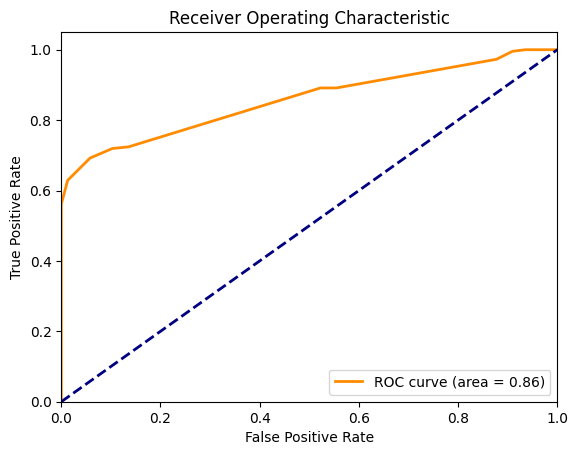

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
classifier = RandomForestClassifier(bootstrap=False, max_depth=5,max_features=None,  
                             min_samples_split=2,  
                             n_estimators=100, random_state=0)  
'''
bootstrap=False: Specifies that bootstrap samples are not used when building trees. Without bootstrapping, the whole training set will be used to build each tree.
max_depth=5: Limits the maximum depth of each decision tree in the forest to 5 levels. This helps prevent overfitting by limiting the complexity of each tree.
max_features=None: When looking for the best split at each node, all features are considered. If it were set to a value, only a subset of features would be considered.
min_samples_split=2: Specifies the minimum number of samples required to split an internal node. If a node has fewer than this number of samples, it will not be split further.
n_estimators=100: Specifies the number of decision trees in the forest. A larger number of trees can improve performance but also increase computation time.
random_state=0: Sets the seed for the random number generator used by the classifier. This ensures that the results are reproducible. If another random state value or no value is set, the results could vary due to randomness in the algorithm.
'''
classifier.fit(X_train,y_train)  
y_pred = classifier.predict(X_test)  
print("Without CV: ",accuracy_score(y_test,y_pred))  
scores = cross_val_score(classifier, X_train, y_train, cv=10)  
print("With CV: ",scores.mean())  
print("Precision Score: ", precision_score(y_test, y_pred))  
print("Recall Score: ", recall_score(y_test, y_pred))  
print("F1 Score: ", f1_score(y_test, y_pred))  

# Calculate precision, recall, and F1 score
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

# Calculate AUC-ROC score
y_pred_proba = classifier.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_pred_proba)
print("AUC-ROC Score: ", auc_roc)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_roc)
#width of the line.
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

The accuracy of the model with CV is 83%, and without CV is 80%.

We can say that the accuracy of the model that we created is quite high.

The likelihood that a student will be hired by a firm may be predicted using placement prediction utilizing machine learning techniques. The application of machine learning algorithms offers a more data-driven and objective approach to the hiring process, allowing businesses to find potential applicants who would have gone unnoticed using conventional hiring techniques. Machine learning is becoming more and more prevalent across a wide range of sectors, and placement prediction using machine learning algorithms is poised to become a crucial tool in the hiring process.